In [1]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular, Unit
from py_ballisticcalc import DragModel, TableG1
from py_ballisticcalc import Ammo
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

Set.Units.distance = Unit.METER
Set.Units.velocity = Unit.MPS
Set.Units.sight_height = Unit.CENTIMETER

In [2]:
# Define standard .51
dm = DragModel(0.62, TableG1, 661, 0.51)
ammo = Ammo(dm, 2.3, 837)

In [3]:
# Establish 500-meter zero
weapon = Weapon(9, 500, 15, Unit.DEGREE(30))
calc = Calculator(weapon, ammo)
zero_elevation = calc.elevation
print(f'Barrel elevation for zero: {zero_elevation << Unit.MIL}')

Barrel elevation for zero: 537.37MIL


ext True
Danger space at 1000.018m for 500.0cm tall target ranges from 996.666m to 1003.371m


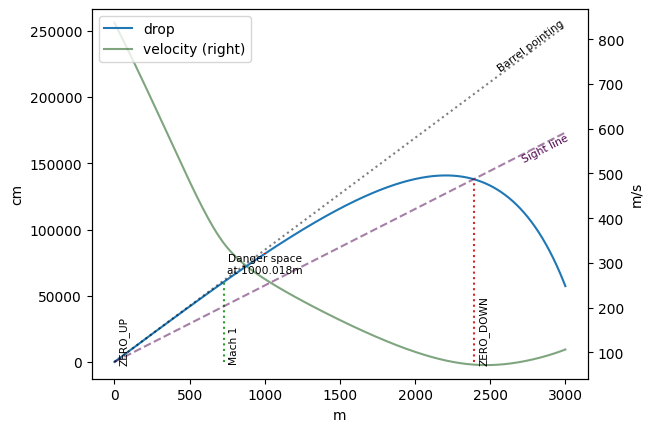

In [4]:
# Plot trajectory out to 500 yards
shot = Shot(3000, zero_angle=calc.elevation, relative_angle=Unit.DEGREE(10))
shot_result = calc.fire(shot, 100, extra_data=True)
ax = shot_result.plot()
# Find danger space for a half-meter tall target at 300 yards
danger_space = shot_result.danger_space(
    1000, 5, Unit.MIL(0)
)
print(danger_space)
# Highlight danger space on the plot
danger_space.overlay(ax)
plt.show()

In [5]:
shot_result.dataframe.to_clipboard()